# Principe

Sur un tableau de n éléments (numérotés de 0 à N-1), le tri par insertion 

* 

Nous allons l'illustrer en triant le tableau TAB ci-dessous.

In [1]:
TAB = [ 5, 3, 8, 1, 4, 2, 7, 6 ]
print(TAB)

[5, 3, 8, 1, 4, 2, 7, 6]


# Boucle interne

Le coeur de l'algorithme consiste à insérer l'élément d'indice k dans le tableau supposé déjà trié des éléments d'indices 0 à k-1. Pour cela

* on copie l'élément k dans une variable temporaire tmp
* tant que tmp est plus petit que l'élément précédent, on déplace cet élément vers la droite et on recule d'une position dans le tableau
* quand on a atteint soit la première position du tableau, soit un élément plus grand ou égal à tmp, on s'arrête et on écrit tmp dans l'emplacement libéré.  

In [2]:
def inserer_un_element(T,k):
    tmp = T[k]
    
    i = k
    while i > 0 and tmp < T[i-1]:
        T[i] = T[i-1]
        i -= 1
    
    T[i] = tmp

Un tableau de 1 élément est toujours trié. On commence donc par insérer le deuxième élément (d'indice 1).

In [3]:
T = TAB.copy()
inserer_un_element(T,1)
print(T[:2],T[2:])  

[3, 5] [8, 1, 4, 2, 7, 6]


Les deux premiers éléments sont maintenant triés. Insérons le troisième

In [4]:
inserer_un_element(T,2)
print(T[:3],T[3:])

[3, 5, 8] [1, 4, 2, 7, 6]


Puis le quatrième

In [5]:
inserer_un_element(T,3)
print(T[:4],T[4:])

[1, 3, 5, 8] [4, 2, 7, 6]


# Boucle externe 

On répète ce processus jusqu'à ce qu'on aie inséré tous les éléments

In [6]:
T = TAB.copy()
N = len(T)
print(T[:1],T[1:])

for i in range(1,N):
    inserer_un_element(T,i)
    print(T[:i+1],T[i+1:])
    # les éléments d'indices 0 à i sont triés, les suivants non

[5] [3, 8, 1, 4, 2, 7, 6]
[3, 5] [8, 1, 4, 2, 7, 6]
[3, 5, 8] [1, 4, 2, 7, 6]
[1, 3, 5, 8] [4, 2, 7, 6]
[1, 3, 4, 5, 8] [2, 7, 6]
[1, 2, 3, 4, 5, 8] [7, 6]
[1, 2, 3, 4, 5, 7, 8] [6]
[1, 2, 3, 4, 5, 6, 7, 8] []


# En résumé

Le tri par insertion effectue deux boucles imbiquées. La boucle interne insère l'élément d'indice k dans le sous-tableau le précédent. La boucle externe fait varier cet indice k de la deuxième à la dernière position. 

In [7]:
def tri_par_insertion(T):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        
        i = k
        while i > 0 and tmp < T[i-1]:
            T[i] = T[i-1]
            i -= 1
        T[i] = tmp

In [8]:
T = TAB.copy()
print(T)
tri_par_insertion(T)
print(T)

[5, 3, 8, 1, 4, 2, 7, 6]
[1, 2, 3, 4, 5, 6, 7, 8]


# Complexité

Pour évaluer la complexité de cet algorithme, réécrivons le pour qu'il compte le nombre de comparaisons et d'écritures dans le tableau (il n'y a pas d'échanges dans ce tri). 

In [9]:
def tri_par_insertion_cnt(T):
    nb_comparaisons = nb_ecritures = 0
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        i = k
        nb_comparaisons += 1
        while i > 0 and tmp < T[i-1]:
            nb_comparaisons += 1
            T[i] = T[i-1]
            nb_ecritures += 1
            i -= 1
        T[i] = tmp
        nb_ecritures
    return nb_comparaisons, nb_ecritures

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement.

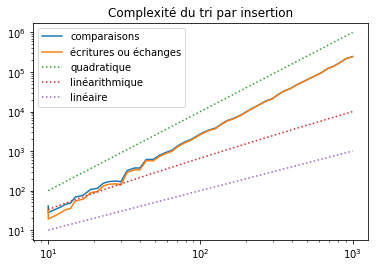

    N |     Comp. |      Ech.
-------------------------------
   10 |        41 |        32
   19 |       107 |        89
   37 |       373 |       337
   71 |      1358 |      1288
  138 |      4916 |      4779
  268 |     18407 |     18140
  517 |     67481 |     66965
 1000 |    244752 |    243753


In [19]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri par insertion")

Nous voyons que le nombre de comparaisons a une complexité quadratique en $\Theta(n^2)$ pour trier $n$ éléments. 

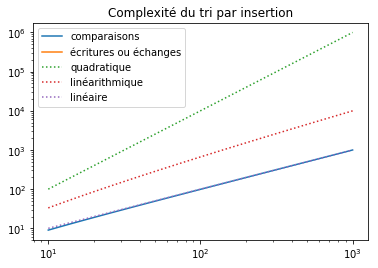

    N |     Comp. |      Ech.
-------------------------------
   10 |         9 |         0
   19 |        18 |         0
   37 |        36 |         0
   71 |        70 |         0
  138 |       137 |         0
  268 |       267 |         0
  517 |       516 |         0
 1000 |       999 |         0


In [11]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      hlp.tableau_trie, 
                      "tri par insertion")

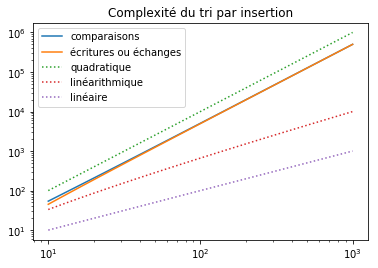

    N |     Comp. |      Ech.
-------------------------------
   10 |        54 |        45
   19 |       189 |       171
   37 |       702 |       666
   71 |      2555 |      2485
  138 |      9590 |      9453
  268 |     36045 |     35778
  517 |    133902 |    133386
 1000 |    500499 |    499500


In [12]:
import include.helpers as hlp
    
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      hlp.tableau_trie_inverse, 
                      "tri par insertion")

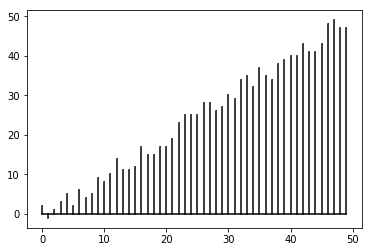

In [13]:
import include.helpers as hlp
import numpy as np
import matplotlib.pyplot as plt

def tableau_presque_trie(n):
    return [ i + np.random.randint(-3,3) for i in range(0,n) ]
    
plt.stem(tableau_presque_trie(50),markerfmt=',',linefmt='black',basefmt='black')
plt.show()

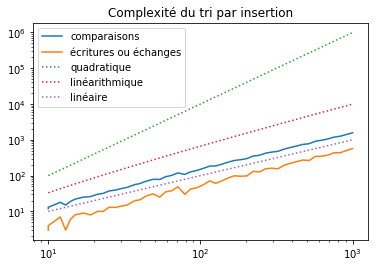

    N |     Comp. |      Ech.
-------------------------------
   10 |        12 |         3
   19 |        26 |         8
   37 |        56 |        20
   71 |       119 |        49
  138 |       208 |        71
  268 |       423 |       156
  517 |       779 |       263
 1000 |      1572 |       573


In [14]:
hlp.evalue_complexite(tri_par_insertion_cnt, 
                      tableau_presque_trie, 
                      "tri par insertion")

# Stabilité

Le tri par insertion est stable. 

Pour l'illuster, il faut réécrire le tri avec une fonction de comparaison générique. 

In [15]:
def tri_par_insertion_generique(T,plus_petit):
    N = len(T)
    for k in range(1,N):
        tmp = T[k]
        
        i = k
        while i > 0 and plus_petit(tmp,T[i-1]):
            T[i] = T[i-1]
            i -= 1
        T[i] = tmp

Nous pouvons maintenant trier la liste des membres des familles Aubert, Bonnet et Caron. 

In [16]:
T = hlp.tableau_de_noms()
hlp.afficher_noms(T)

       Nom |     Prénom
-----------+-----------
    Aubert |   Beatrice
     Caron |      Alain
    Bonnet |  Christine
    Bonnet |       Anne
    Aubert |  Alexandre
     Caron |  Catherine
    Bonnet |     Benoit
    Aubert |      Denis
    Aubert |     Carole
     Caron |   Brigitte


Trier cette liste d'abord par prénom puis par nom nous donne une liste triée par prénom au sein de chaque famille.

In [17]:
tri_par_insertion_generique(T,hlp.compare_prenoms)
tri_par_insertion_generique(T,hlp.compare_noms)
hlp.afficher_noms(T)

       Nom |     Prénom
-----------+-----------
    Aubert |  Alexandre
    Aubert |   Beatrice
    Aubert |     Carole
    Aubert |      Denis
    Bonnet |       Anne
    Bonnet |     Benoit
    Bonnet |  Christine
     Caron |      Alain
     Caron |   Brigitte
     Caron |  Catherine


##### Visualisation

Finalement, visualisons graphiquement le tri de 50 entiers aléatoires entre 0 et 100

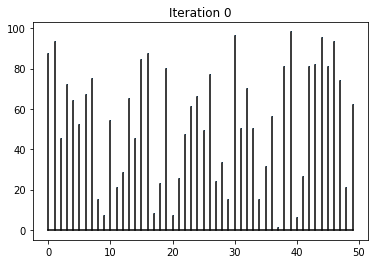

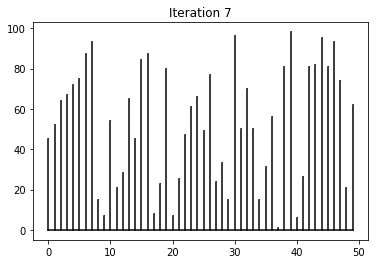

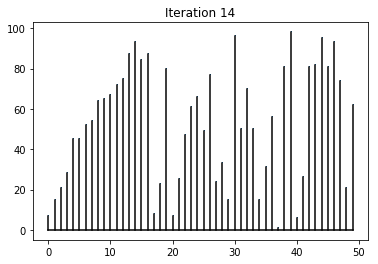

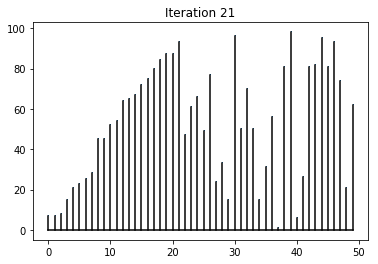

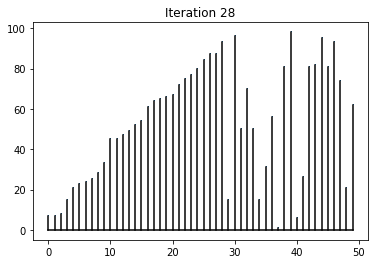

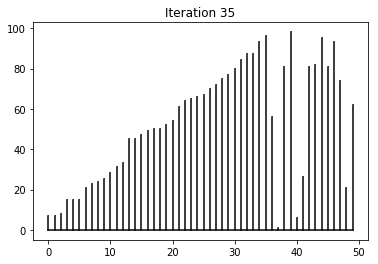

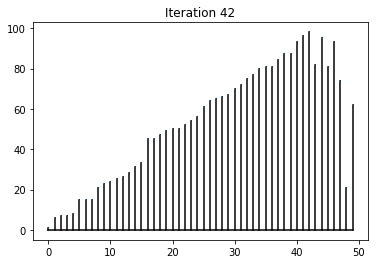

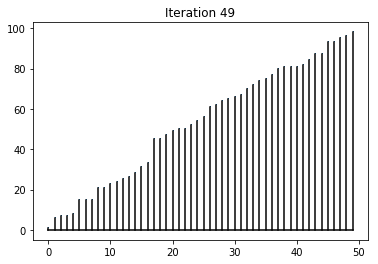

In [18]:
hlp.visualisation_tri_par_insertion()